In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision', 2) 
# Configuramos Pandas para mostrar solo dos decimales en los valores numéricos


In [2]:
#Ejemplo:
# Datos de ejemplo
x = [77, 18, 63, 84, ,34 59, 59, 54, 56, 36, 26, 34, 44,
        41, 58, 58, 53, 51, 62, 43, 52, 53, 63, 62, 65, 51, 62, 60, 68, 45, 65, 83, 71, 63, 58, 61]
    

In [16]:
# definimos el número de clases:
num_clases = 7

# hallamos el valor mínimo:
val_min = min(x)

# hallamos el valor máximo:
val_max = max(x)

# hallamos el ancho (amplitud) de la clase
A = (val_max - val_min) / num_clases
print(A)
# Dado que A=9.42, podemos tomar el ancho de clases igual a 10 y considerar el primer intervalo de
#clase partiendo de 16 con el fin de que el último intervalo tenga como límite superior a 86.

A= 10

9.428571428571429


In [24]:
# Inciamos la primera clase en 16.
# Definir los límites
limites = [16+ A*i for i in range(num_clases+1)]   #limites = [16,26,36,...]

In [37]:
df = pd.cut(x,bins =limites, include_lowest =True, right = False  )

df = pd.value_counts(df,sort = False).reset_index()

In [38]:
df.columns = ['Intervalo','Frecuencia']

In [39]:
df

,Intervalo,Frecuencia
0,"[16, 26)",1
1,"[26, 36)",3
2,"[36, 46)",5
3,"[46, 56)",6
4,"[56, 66)",16
5,"[66, 76)",2
6,"[76, 86)",3


In [40]:
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()

In [41]:
df

,Intervalo,Frecuencia,Frecuencia acumulada
0,"[16, 26)",1,1
1,"[26, 36)",3,4
2,"[36, 46)",5,9
3,"[46, 56)",6,15
4,"[56, 66)",16,31
5,"[66, 76)",2,33
6,"[76, 86)",3,36


In [42]:
len(x)

36

In [43]:
df['Frecuencia relativa'] = df['Frecuencia'] / len(x)

In [44]:
df

,Intervalo,Frecuencia,Frecuencia acumulada,Frecuencia relativa
0,"[16, 26)",1,1,0.027778
1,"[26, 36)",3,4,0.083333
2,"[36, 46)",5,9,0.138889
3,"[46, 56)",6,15,0.166667
4,"[56, 66)",16,31,0.444444
5,"[66, 76)",2,33,0.055556
6,"[76, 86)",3,36,0.083333


# Ejemplo: 
Considere la base de datos de los indices de peso

https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

y considere la columna `Weight`.  

Calcula una tabla de frecuencias para la variable 'Weight' 
tomando como límite inferior del primer intervalo el primer cuartil Q1 y como limite superior del último intervalo el tercer cuartil  Q3 el conjunto de datos proporcionado. Considere un número de clases apropiado escogiendo un valor entre 5 y 20.

Discute los resultados y preséntalos en un gráfico.


In [45]:
data = pd.read_csv('data.csv')

In [56]:
# Calculemos el primer y el tercer cuartil

q1 = np.quantile(data['Weight'],0.25)
q3 = np.quantile(data['Weight'],0.75)


In [57]:
# datos filtrados

filtered_data = data[(data['Weight']>= q1) &  (data['Weight']<= q3)]


In [74]:
# definamos el número de clases:
num_clases = 10

rango = q3 - q1

In [75]:
A = rango / num_clases

In [76]:
A

4.1957339000000005

In [77]:
limites = [q1 +A * i for i in range(num_clases+1)]

df = pd.cut(filtered_data['Weight'], bins = limites,include_lowest = True, right = False )
df= pd.value_counts(df,sort=False).reset_index()

In [81]:
df.columns = ['Intervalo', 'Frecuencia']


#Calculamos la marca de clase:
df['Marca de clase'] = df['Intervalo'].apply(lambda x: (x.left + x.right) / 2)

# Calcular la frecuencia acumulada
df['Frecuencia acumulada'] = df['Frecuencia'].cumsum()



# Calcular la frecuencia relativa
df['Frecuencia relativa'] = df['Frecuencia'] / len(data)

# Calcular la frecuencia relativa acumulada
df['Frecuencia relativa acumulada'] = df['Frecuencia relativa'].cumsum()

# Mostrar la tabla de frecuencias
print(df)


            Intervalo  Frecuencia Marca de clase  Frecuencia acumulada  \
0    [65.473, 69.669)          81          67.57                    81   
1    [69.669, 73.865)          88          71.77                   169   
2    [73.865, 78.061)         140          75.96                   309   
3    [78.061, 82.256)         187          80.16                   496   
4    [82.256, 86.452)         142          84.35                   638   
5    [86.452, 90.648)         107          88.55                   745   
6    [90.648, 94.843)          40          92.75                   785   
7    [94.843, 99.039)          64          96.94                   849   
8   [99.039, 103.235)          83         101.14                   932   
9  [103.235, 107.431)         123         105.33                  1055   

   Frecuencia relativa  Frecuencia relativa acumulada  
0                 0.04                           0.04  
1                 0.04                           0.08  
2                

In [85]:
df

,Intervalo,Frecuencia,Marca de clase,Frecuencia acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,"[65.473, 69.669)",81,67.57,81,0.04,0.04
1,"[69.669, 73.865)",88,71.77,169,0.04,0.08
2,"[73.865, 78.061)",140,75.96,309,0.07,0.15
3,"[78.061, 82.256)",187,80.16,496,0.09,0.23
4,"[82.256, 86.452)",142,84.35,638,0.07,0.30
5,"[86.452, 90.648)",107,88.55,745,0.05,0.35
6,"[90.648, 94.843)",40,92.75,785,0.02,0.37
7,"[94.843, 99.039)",64,96.94,849,0.03,0.40
8,"[99.039, 103.235)",83,101.14,932,0.04,0.44
9,"[103.235, 107.431)",123,105.33,1055,0.06,0.50


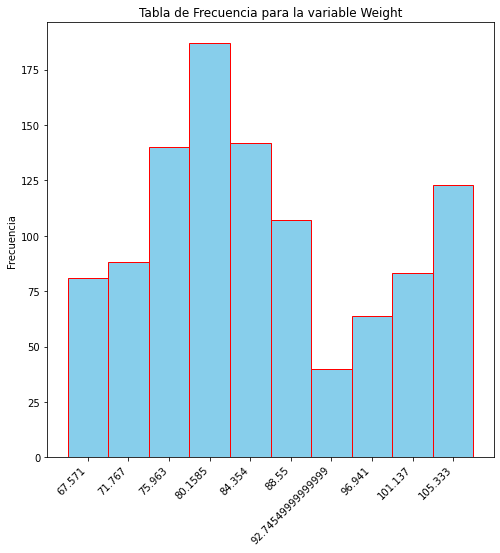

In [86]:
bins = df['Marca de clase'].tolist()
# Frecuencias para cada bin
frequencies = df['Frecuencia'].tolist()

plt.figure(figsize=(8, 8))  # tamaño del gráfico
plt.bar(bins, frequencies,width=A, edgecolor='black', align='center', color='skyblue')
plt.xticks(ticks=bins, labels=bins, rotation=45, ha='right')  # Ajustar los ticks y etiquetas
plt.title('Tabla de Frecuencia para la variable Weight')
plt.ylabel('Frecuencia')
plt.show()

In [84]:
bins

[67.571,
 71.767,
 75.963,
 80.1585,
 84.354,
 88.55,
 92.74549999999999,
 96.941,
 101.137,
 105.333]